In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv("train_jqd04QH.csv")
test_df = pd.read_csv("test_KaymcHn.csv")

In [3]:
def outlier_iqr(df, column, whisker_width=1.5):
    """Remove outliers from a dataframe by column, including optional 
       whiskers, removing rows for which the column value are 
       less than Q1-1.5IQR or greater than Q3+1.5IQR.
    Args:
        df (`:obj:pd.DataFrame`): A pandas dataframe to subset
        column (str): Name of the column to calculate the subset from.
        whisker_width (float): Optional, loosen the IQR filter by a
                               factor of `whisker_width` * IQR.
    Returns:
        (`:obj:pd.DataFrame`): Filtered dataframe
    """
    # Calculate Q1, Q2 and IQR
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    # Apply filter with respect to IQR, including optional whiskers
    filter = (df[column] >= q1 - whisker_width*iqr) & (df[column] <= q3 + whisker_width*iqr)
    return df.loc[filter]                                                     

# Example for whiskers = 1.5
#df_filtered = outlier_iqr(df, 'column_name', whisker_width=1.5)

In [4]:
train_df.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1
5,13342,city_21,0.624,Female,Has relevent experience,no_enrollment,Graduate,Other,8,5000-9999,Pvt Ltd,2,34,0
6,11746,city_21,0.624,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,10000+,Pvt Ltd,3,23,1
7,24127,city_114,0.926,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,<10,Pvt Ltd,>4,8,0
8,7615,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,1000-4999,Pvt Ltd,>4,10,0
9,9676,city_97,0.925,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,1000-4999,Pvt Ltd,>4,85,0


In [5]:
train_df.describe()

,enrollee_id,city_development_index,training_hours,target
count,18359.000000,18359.000000,18359.000000,18359.000000
mean,16729.360096,0.847140,65.899014,0.132088
std,9643.749725,0.110189,60.885300,0.338595
min,1.000000,0.448000,1.000000,0.000000
25%,8378.500000,0.796000,23.000000,0.000000
50%,16706.000000,0.910000,47.000000,0.000000
75%,25148.500000,0.920000,89.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [6]:
train_df.info()
print ('----------------------------------------------')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18359 non-null  int64  
 1   city                    18359 non-null  object 
 2   city_development_index  18359 non-null  float64
 3   gender                  14261 non-null  object 
 4   relevent_experience     18359 non-null  object 
 5   enrolled_university     18017 non-null  object 
 6   education_level         17902 non-null  object 
 7   major_discipline        15521 non-null  object 
 8   experience              18300 non-null  object 
 9   company_size            13580 non-null  object 
 10  company_type            13320 non-null  object 
 11  last_new_job            17992 non-null  object 
 12  training_hours          18359 non-null  int64  
 13  target                  18359 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

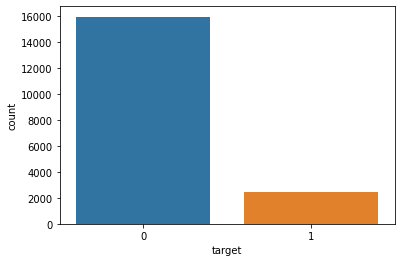

In [7]:
sns.countplot(x='target', data=train_df)
#target 0 - not looking for job, 1 = looking for a job
# highly imbalanced class

# EDA

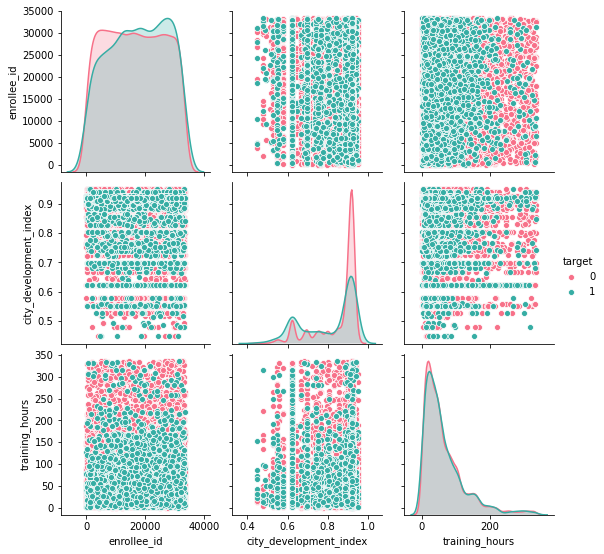

In [8]:
sns.pairplot(data=train_df, hue="target", palette="husl")

In [9]:
# Job searchers have less training hours compared --- probably freshers
# Majority belong to developed cities --- more opportunities

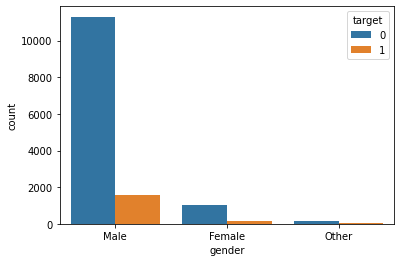

In [10]:
#Exploring certain graphs 
sns.countplot(x='gender', hue='target', data=train_df)

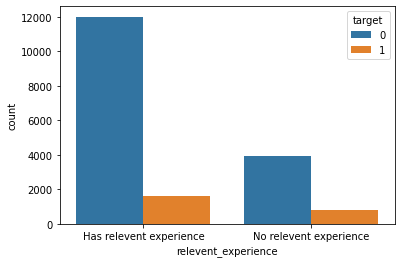

In [11]:
sns.countplot(x='relevent_experience', hue='target', data=train_df)

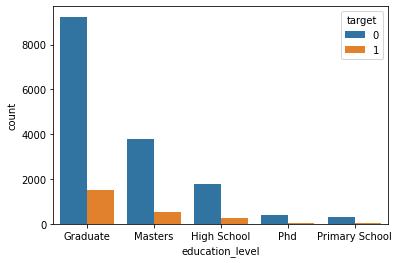

In [12]:
sns.countplot(x='education_level', hue='target', data=train_df)

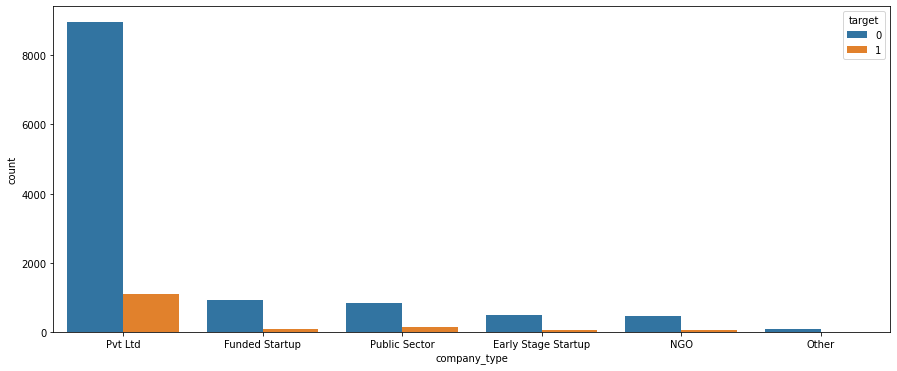

In [13]:
plt.subplots(figsize=(15,6))
sns.countplot(x='company_type', hue='target', data=train_df)

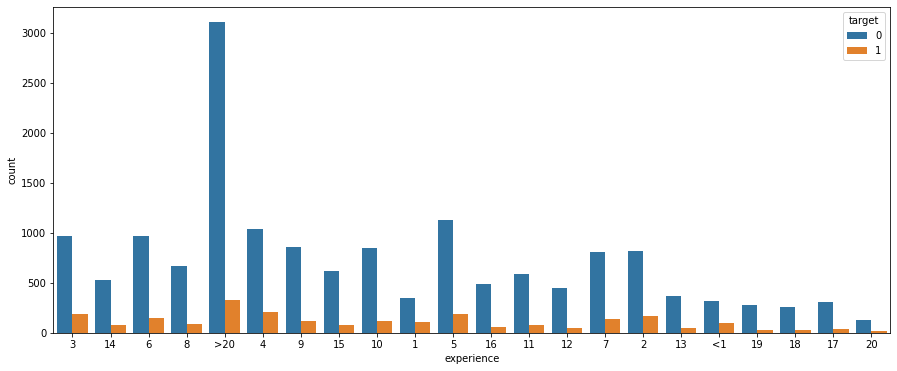

In [14]:
plt.subplots(figsize=(15,6))
sns.countplot(x='experience', hue='target', data=train_df)

In [15]:
missing_val = pd.concat([train_df.isnull().sum(), test_df.isnull().sum()], axis=1, keys=['Train', 'Test'])
missing_val[missing_val.sum(axis=1) > 0]
# 15% of 18300 - 2745
# 15% of 15000 - 2250

,Train,Test
gender,4098,3388.0
enrolled_university,342,279.0
education_level,457,395.0
major_discipline,2838,2393.0
experience,59,44.0
company_size,4779,4051.0
company_type,5039,4330.0
last_new_job,367,304.0


In [16]:
train_df.drop(['gender','major_discipline', 'company_size', 'company_type'],axis=1,inplace=True)

In [17]:
train_df['enrolled_university'] = train_df['enrolled_university'].replace(np.nan, 'Unknown', regex=True)
train_df['education_level'] = train_df['education_level'].replace(np.nan, 'Unknown', regex=True)
train_df['experience'] = train_df['experience'].replace(np.nan, 'Unknown', regex=True)
train_df['last_new_job'] = train_df['last_new_job'].replace(np.nan, 'Unknown', regex=True)

In [18]:
missing_val = pd.concat([train_df.isnull().sum(), test_df.isnull().sum()], axis=1, keys=['Train', 'Test'])
missing_val[missing_val.sum(axis=1) > 0]

,Train,Test
enrolled_university,0.0,279.0
education_level,0.0,395.0
experience,0.0,44.0
last_new_job,0.0,304.0
gender,NaN,3388.0
major_discipline,NaN,2393.0
company_size,NaN,4051.0
company_type,NaN,4330.0


In [19]:
train_df.head()

,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,last_new_job,training_hours,target
0,23798,city_149,0.689,Has relevent experience,no_enrollment,Graduate,3,1,106,0
1,29166,city_83,0.923,Has relevent experience,no_enrollment,Graduate,14,1,69,0
2,46,city_16,0.910,Has relevent experience,no_enrollment,Graduate,6,2,4,0
3,18527,city_64,0.666,Has relevent experience,no_enrollment,Graduate,14,1,26,0
4,21751,city_100,0.887,No relevent experience,no_enrollment,Masters,8,2,88,1


In [20]:
from sklearn.preprocessing import LabelEncoder
label_x = LabelEncoder()

In [21]:
train_df.iloc[:,1]=label_x.fit_transform(train_df.iloc[:,1])
train_df.iloc[:,3]=label_x.fit_transform(train_df.iloc[:,3])
train_df.iloc[:,4]=label_x.fit_transform(train_df.iloc[:,4])
train_df.iloc[:,5]=label_x.fit_transform(train_df.iloc[:,5])
train_df.iloc[:,6]=label_x.fit_transform(train_df.iloc[:,6])
train_df.iloc[:,7]=label_x.fit_transform(train_df.iloc[:,7])

In [22]:
train_df.shape

(18359, 10)

In [23]:
X=np.zeros((18359, 9))
y=np.zeros((18359, 1))
X=train_df.iloc[:,0:9]
y=train_df['target']

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
X_train.shape

(12851, 9)

In [25]:
from xgboost import XGBClassifier
model = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=5)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [26]:
y_pred=model.predict(X_test)

In [27]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score

In [28]:
accuracy_score(y_test, y_pred)

0.8513071895424836

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      4769
           1       0.21      0.04      0.06       739

    accuracy                           0.85      5508
   macro avg       0.54      0.51      0.49      5508
weighted avg       0.78      0.85      0.80      5508



In [30]:
print(roc_auc_score(y_test, y_pred))

0.507621391082632


In [31]:
from collections import Counter

def get_class_weights(y):
    counter = Counter(y)
    majority = max(counter.values())
    return  {cls: round(float(majority)/float(count), 2) for cls, count in counter.items()}

#train = pd.read('train.csv')
class_weights = get_class_weights(y_train)
print(class_weights)

{0: 1.0, 1: 6.62}


In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 250, random_state = 0, class_weight= class_weights)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 1.0, 1: 6.62}, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=250, n_jobs=None, oob_score=False,
                       random_state=0, verbose=0, warm_start=False)

In [33]:
y_pred_rfc=rfc.predict(X_test)

In [34]:
print(roc_auc_score(y_test, y_pred_rfc))

0.5010190702186625


In [35]:
# grid search k value for SMOTE oversampling for imbalanced classification
'''
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# values to evaluate
k_values = [1, 2, 3, 4, 5, 6, 7]
for k in k_values:
# define pipeline
	model = DecisionTreeClassifier()
	over = SMOTE(sampling_strategy=0.1, k_neighbors=k)
	under = RandomUnderSampler(sampling_strategy=0.5)
	steps = [('over', over), ('under', under), ('model', model)]
	pipeline = Pipeline(steps=steps)
	# evaluate pipeline
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, y_test, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
	score = mean(scores)
	print('> k=%d, Mean ROC AUC: %.3f' % (k, score))
    '''

"\nfrom sklearn.model_selection import cross_val_score\nfrom sklearn.model_selection import RepeatedStratifiedKFold\nfrom sklearn.tree import DecisionTreeClassifier\nfrom imblearn.pipeline import Pipeline\nfrom imblearn.over_sampling import SMOTE\nfrom imblearn.under_sampling import RandomUnderSampler\n\n# values to evaluate\nk_values = [1, 2, 3, 4, 5, 6, 7]\nfor k in k_values:\n# define pipeline\n\tmodel = DecisionTreeClassifier()\n\tover = SMOTE(sampling_strategy=0.1, k_neighbors=k)\n\tunder = RandomUnderSampler(sampling_strategy=0.5)\n\tsteps = [('over', over), ('under', under), ('model', model)]\n\tpipeline = Pipeline(steps=steps)\n\t# evaluate pipeline\n\tcv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)\n\tscores = cross_val_score(pipeline, y_test, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)\n\tscore = mean(scores)\n\tprint('> k=%d, Mean ROC AUC: %.3f' % (k, score))\n    "

In [36]:
'''
# standard neural network on an imbalanced classification dataset
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score
from keras.layers import Dense
from keras.models import Sequential

# prepare train and test dataset
def prepare_data():
	# generate 2d classification dataset
	X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=2, weights=[0.99], flip_y=0, random_state=4)
	# split into train and test
	n_train = 5000
	trainX, testX = X[:n_train, :], X[n_train:, :]
	trainy, testy = y[:n_train], y[n_train:]
	return trainX, trainy, testX, testy

# define the neural network model
def define_model(n_input):
	# define model
	model = Sequential()
	# define first hidden layer and visible layer
	model.add(Dense(10, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
	# define output layer
	model.add(Dense(1, activation='sigmoid'))
	# define loss and optimizer
	model.compile(loss='binary_crossentropy', optimizer='sgd')
	return model

# prepare dataset
#trainX, trainy, testX, testy = prepare_data()
# define the model
n_input = X_train.shape[1]
model = define_model(n_input)
# fit model
model.fit(X_train, y_train, class_weight = class_weights, epochs=100, verbose=0)
# make predictions on the test dataset
yhat = model.predict(X_test)
# evaluate the ROC AUC of the predictions
score = roc_auc_score(y_test, yhat)
print('ROC AUC: %.3f' % score)
'''

"\n# standard neural network on an imbalanced classification dataset\nfrom sklearn.datasets import make_classification\nfrom sklearn.metrics import roc_auc_score\nfrom keras.layers import Dense\nfrom keras.models import Sequential\n\n# prepare train and test dataset\ndef prepare_data():\n\t# generate 2d classification dataset\n\tX, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,\n\tn_clusters_per_class=2, weights=[0.99], flip_y=0, random_state=4)\n\t# split into train and test\n\tn_train = 5000\n\ttrainX, testX = X[:n_train, :], X[n_train:, :]\n\ttrainy, testy = y[:n_train], y[n_train:]\n\treturn trainX, trainy, testX, testy\n\n# define the neural network model\ndef define_model(n_input):\n\t# define model\n\tmodel = Sequential()\n\t# define first hidden layer and visible layer\n\tmodel.add(Dense(10, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))\n\t# define output layer\n\tmodel.add(Dense(1, activation='sigmoid'))\n\t# define loss and opt

In [37]:
'''
from sklearn import svm
from sklearn.datasets import make_blobs

# we create two clusters of random points
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(n_samples=[n_samples_1, n_samples_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)


# fit the model and get the separating hyperplane
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X, y)

# fit the model and get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel='linear', class_weight={1: 10})
wclf.fit(X, y)

# plot the samples
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

# plot the decision functions for both classifiers
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# get the separating hyperplane
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
a = ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])

# get the separating hyperplane for weighted classes
Z = wclf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins for weighted classes
b = ax.contour(XX, YY, Z, colors='r', levels=[0], alpha=0.5, linestyles=['-'])

plt.legend([a.collections[0], b.collections[0]], ["non weighted", "weighted"],
           loc="upper right")
plt.show()
'''

'\nfrom sklearn import svm\nfrom sklearn.datasets import make_blobs\n\n# we create two clusters of random points\nn_samples_1 = 1000\nn_samples_2 = 100\ncenters = [[0.0, 0.0], [2.0, 2.0]]\nclusters_std = [1.5, 0.5]\nX, y = make_blobs(n_samples=[n_samples_1, n_samples_2],\n                  centers=centers,\n                  cluster_std=clusters_std,\n                  random_state=0, shuffle=False)\n\n\n# fit the model and get the separating hyperplane\nclf = svm.SVC(kernel=\'linear\', C=1.0)\nclf.fit(X, y)\n\n# fit the model and get the separating hyperplane using weighted classes\nwclf = svm.SVC(kernel=\'linear\', class_weight={1: 10})\nwclf.fit(X, y)\n\n# plot the samples\nplt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors=\'k\')\n\n# plot the decision functions for both classifiers\nax = plt.gca()\nxlim = ax.get_xlim()\nylim = ax.get_ylim()\n\n# create grid to evaluate model\nxx = np.linspace(xlim[0], xlim[1], 30)\nyy = np.linspace(ylim[0], ylim[1], 30)\nYY, XX = np

In [38]:
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve

In [39]:
svc = SVC(random_state=42, class_weight=class_weights)
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight={0: 1.0, 1: 6.62},
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='rbf', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False)

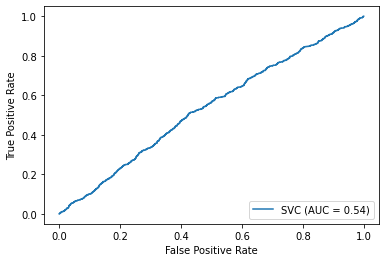

In [40]:
svc_disp = plot_roc_curve(svc, X_test, y_test)
plt.show()

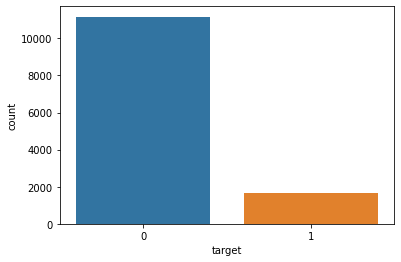

In [41]:
sns.countplot(x=y_train)

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler = MinMaxScaler()

In [44]:
X_train = scaler.fit_transform(X_train)

In [45]:
X_test = scaler.transform(X_test)

In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [47]:
model = Sequential()

In [48]:
model.add(Dense(9, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(5, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(3, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(loss= 'binary_crossentropy', optimizer = 'adam')

In [49]:
model.fit(x=X_train, y=y_train, epochs = 25, batch_size = 128,
          validation_data = (X_test,y_test) )

ValueError: Please provide as model inputs either a single array or a list of arrays. You passed: target=6015     0
3160     0
14467    0
3957     0
3252     0
        ..
5695     0
8006     0
17745    0
17931    0
13151    0
Name: target, Length: 12851, dtype: int64